In [1]:
from cloudvolume import CloudVolume
from cloudvolume.lib import Bbox
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from brainlit.algorithms.detect_somas import find_somas

brain_url = "precomputed://https://dlab-colm.neurodata.io/2021_03_10/Mouse10-Cohort1/ch561-corrected"

mip = 0
cv = CloudVolume(brain_url, mip=mip, fill_missing=True)
res = cv.scales[mip]["resolution"]
print(res)

/cis/home/jteneggi/anaconda3/envs/cuda10/lib/python3.8/site-packages/python_jsonschema_objects/__init__.py:50: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  warnings.warn(


[3720, 3720, 4000]


In [2]:
size = int(300e3)
size_voxel = np.divide(size, res).astype(int)
# print(size_voxel)
soma_coords = [7495800, 5018280, 2824000]
soma_voxel = np.divide(soma_coords, res).astype(int)
print(soma_voxel)
vox_min = [int(u - size_voxel[i]/2) for i, u in enumerate(soma_voxel)]
vox_max = [int(u + size_voxel[i]/2) for i, u in enumerate(soma_voxel)]
# print(vox_min, vox_max)
bbox = Bbox(vox_min, vox_max)
volume = cv.download(bbox, mip=mip).squeeze()
print(volume.shape)

Downloading:  17%|█▋        | 26/150 [00:00<00:00, 252.97it/s]

[2015 1349  706]


Downloading: 286it [00:03, 92.93it/s]                         

(80, 80, 75)


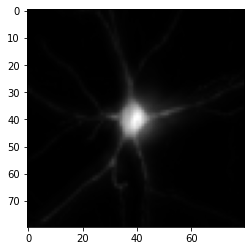

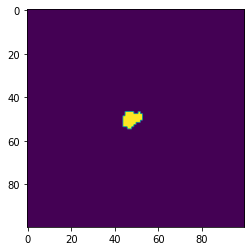

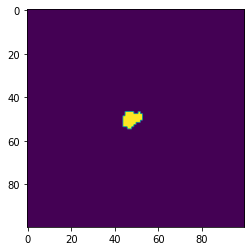

In [3]:
proj = np.amax(volume, axis=2)
plt.imshow(proj, cmap="gray")
plt.show()

# desired_size = np.array([50, 50, 50])
# zoom_factors = np.divide(desired_size, volume.shape)
# out = ndimage.zoom(volume, zoom=zoom_factors)
# out = out / np.max(out.flatten())
# plt.imshow(np.amax(out, axis=2))
# plt.show()

label, rel_centroids, out = find_somas(volume, res)
out_proj = np.amax(out, axis=2)
plt.imshow(out_proj)
plt.show()